 # <center><font color='lightgreen'><u>IBM</u></font> <font color='darkblue'><u>ASSESSMENT</u></font><font color='darkblue'> <u>SOLUTION</u></font><br></center>

## *Importing Necessary Library*

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## *Loading the Dataset*

In [6]:
df=pd.read_csv("Churn_Modelling.csv")

In [7]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.shape

(10000, 14)

In [10]:
df.shape[1]

14

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.select_dtypes(include='O').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [13]:
df.select_dtypes(exclude="O").columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## *Perform **descriptive statistics** on the dataset.*

In [14]:
df.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Find the **outliers** and replace the outliers

C:\Users\ashwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

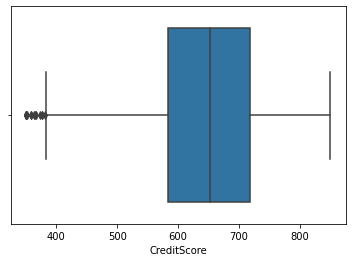

In [16]:
sns.boxplot(df["CreditScore"])

C:\Users\ashwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts'>

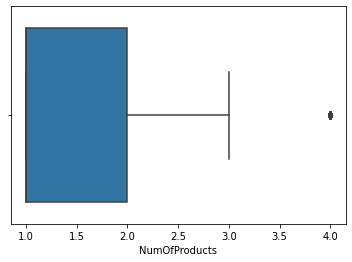

In [17]:
sns.boxplot(df.NumOfProducts)

## *Replace the outliers*

In [18]:
outliers=['CreditScore','NumOfProducts']
for x in outliers:
    q75,q25 = np.percentile(df[x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    # df.drop(df[df[x] < min].index, inplace=True)
    # df.drop(df[df[x] > max].index, inplace=True)
    df.loc[df[x] < min, x] = np.nan
    df.loc[df[x] > max, x] = np.nan

## *Handle the Missing values*

In [19]:
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore        15
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts      60
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

<AxesSubplot:>

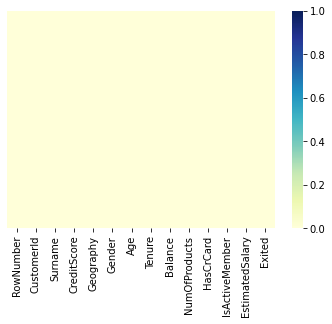

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='YlGnBu')

In [21]:

df['CreditScore']=df['CreditScore'].fillna(np.mean(df['CreditScore']))
df['NumOfProducts']=df['NumOfProducts'].fillna(np.mean(df['NumOfProducts']))

<AxesSubplot:>

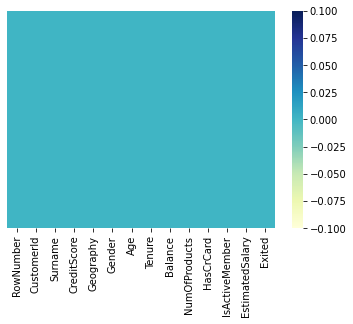

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='YlGnBu')

## *Univariate Analysis and Bi - Variate Analysis*

C:\Users\ashwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='Exited'>

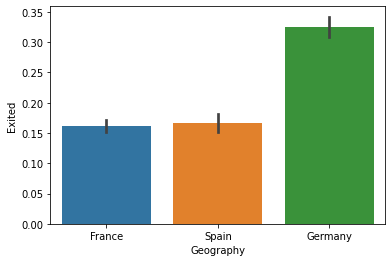

In [23]:
sns.barplot(df['Geography'],df.Exited)

## *Multi - Variate Analysis*

Check for Categorical columns and **perform encoding**.

In [24]:
df.select_dtypes(include='O').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [25]:
print("Number of unique values in Gender  : ",df.Gender.nunique())
df.Gender.value_counts()

Number of unique values in Gender  :  2


Male      5457
Female    4543
Name: Gender, dtype: int64

In [26]:
print("Number of unique values in Geography : ",df.Geography.nunique())
df.Geography.value_counts()

Number of unique values in Geography :  3


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [27]:
categorical_columns = ['Geography','Gender']
for col in categorical_columns:
    col_ohe = pd.get_dummies(df[col])
    df = pd.concat((df, col_ohe), axis=1).drop(col, axis=1)


In [28]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,1,15634602,Hargrave,619.000000,42,2,0.00,1.000000,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608.000000,41,1,83807.86,1.000000,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502.000000,42,8,159660.80,3.000000,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699.000000,39,1,0.00,2.000000,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850.000000,43,2,125510.82,1.000000,1,1,79084.10,0,0,0,1,1,0
5,6,15574012,Chu,645.000000,44,8,113755.78,2.000000,1,0,149756.71,1,0,0,1,0,1
6,7,15592531,Bartlett,822.000000,50,7,0.00,2.000000,1,1,10062.80,0,1,0,0,0,1
7,8,15656148,Obinna,650.963245,29,4,115046.74,1.515292,1,0,119346.88,1,0,1,0,1,0
8,9,15792365,He,501.000000,44,4,142051.07,2.000000,0,1,74940.50,0,1,0,0,0,1
9,10,15592389,H?,684.000000,27,2,134603.88,1.000000,1,1,71725.73,0,1,0,0,0,1


In [29]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [30]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619.0,42,2,0.00,1.0,1,1,101348.88,1,1,0,0,1,0
1,608.0,41,1,83807.86,1.0,0,1,112542.58,0,0,0,1,1,0
2,502.0,42,8,159660.80,3.0,1,0,113931.57,1,1,0,0,1,0
3,699.0,39,1,0.00,2.0,0,0,93826.63,0,1,0,0,1,0
4,850.0,43,2,125510.82,1.0,1,1,79084.10,0,0,0,1,1,0


Split the data into **dependent** and **independent** variables.

In [31]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [32]:
x.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619.0,42,2,0.00,1.0,1,1,101348.88,1,0,0,1,0
1,608.0,41,1,83807.86,1.0,0,1,112542.58,0,0,1,1,0
2,502.0,42,8,159660.80,3.0,1,0,113931.57,1,0,0,1,0


In [33]:
y.head(3)

0    1
1    0
2    1
Name: Exited, dtype: int64

## *Scale the independent variables*

**MinMaxScaler**

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
min_x=pd.DataFrame(scaled)
min_x.sample(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
3353,0.267666,0.175676,0.7,0.000000,0.5,1.0,1.0,0.030561,1.0,0.0,0.0,1.0,0.0
6831,0.184154,0.459459,0.8,0.555976,1.0,0.0,0.0,0.750480,0.0,1.0,0.0,1.0,0.0
5753,0.807281,0.310811,0.6,0.000000,0.5,0.0,0.0,0.507447,0.0,0.0,1.0,1.0,0.0


**StandardScaler**

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
s_x=pd.DataFrame(scaled)
s_x.sample(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
4647,1.354615,-1.041433,-0.350204,-1.225848,0.882796,0.646092,-1.030670,1.349611,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3080,-1.905960,-1.041433,-0.695982,-1.225848,0.882796,0.646092,-1.030670,1.227155,-1.002804,-0.578736,1.742740,-0.912419,0.912419
9619,0.344150,-0.373958,-0.695982,0.376346,-0.938497,0.646092,0.970243,1.335333,-1.002804,1.727904,-0.573809,-0.912419,0.912419


Split the data into **training and testing**

using data that is scale by minmax scalar

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(min_x, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 13) (3000, 13) (7000,) (3000,)


In [37]:
X_train.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12
2960,0.845824,0.148649,0.7,0.491153,0.0,1.0,0.0,0.906134,0.0,1.0,0.0,1.0,0.0


using data that is scale by standard scalar

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(s_x, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 13) (3000, 13) (7000,) (3000,)


In [39]:
X_train.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12
9328,-1.155923,-0.373958,0.68713,0.831548,0.882796,0.646092,-1.03067,1.707007,-1.002804,1.727904,-0.573809,1.095988,-1.095988
